In [29]:
# Cell 1 - Setup and imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Paths
df = pd.read_csv(r"C:\Users\Taizeen\Downloads\EDA1\EDA1\Cardiotocographic.csv") 
output_dir = "/mnt/data/eda_output"
os.makedirs(output_dir, exist_ok=True)

print("Output directory:", output_dir)


Output directory: /mnt/data/eda_output


In [30]:
# Cell 2 - Load data and initial checks
df = pd.read_csv(r"C:\Users\Taizeen\Downloads\EDA1\EDA1\Cardiotocographic.csv") 
print("Dataframe shape:", df.shape)
display(df.head())
display(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataframe shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


None


Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [31]:
display(df.describe(include='all').transpose())

print("\nNSP value counts:")
print(df['NSP'].value_counts().sort_index())

df.head().to_csv(os.path.join(output_dir, "head.csv"), index=False)
df.describe().to_csv(os.path.join(output_dir, "describe.csv"))
df.isnull().sum().to_csv(os.path.join(output_dir, "missing.csv"))


,count,mean,std,min,25%,50%,75%,max
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000



NSP value counts:
NSP
-1.025988    1
-1.000000    5
 0.967075    1
 0.969447    1
 0.972305    1
            ..
 3.015185    1
 3.019152    1
 3.020038    1
 3.034545    1
 5.000000    4
Name: count, Length: 111, dtype: int64


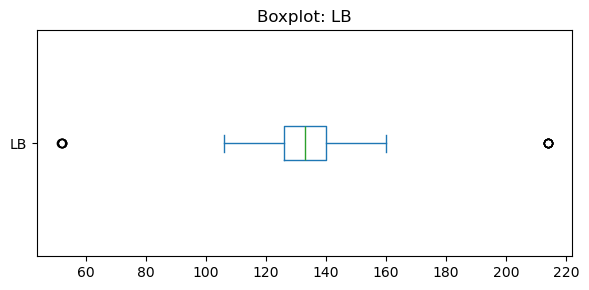

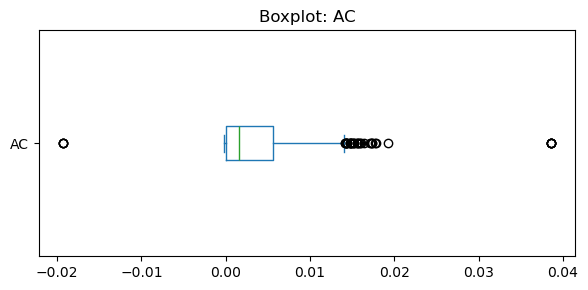

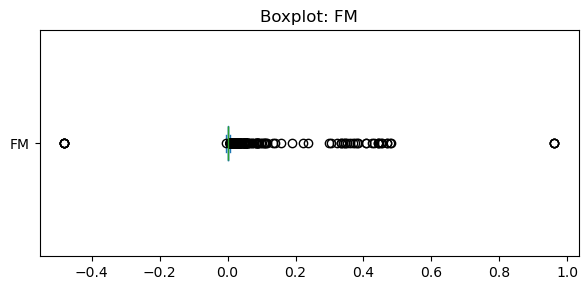

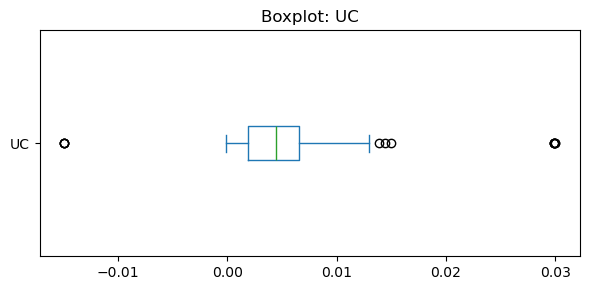

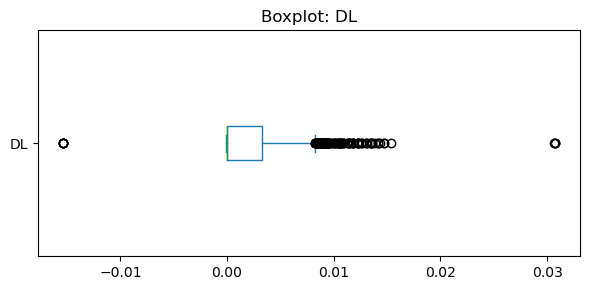

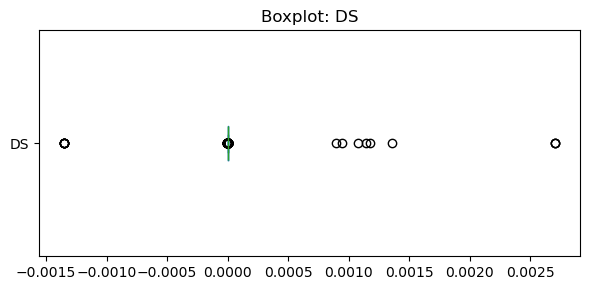

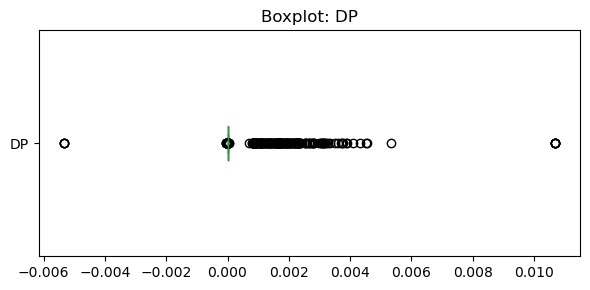

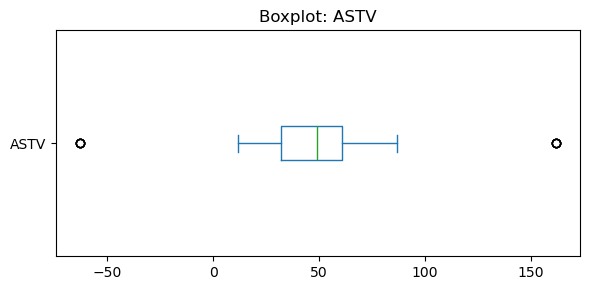

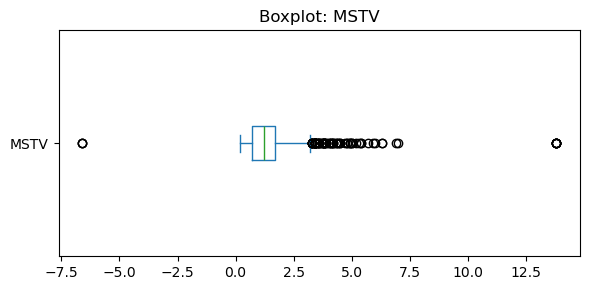

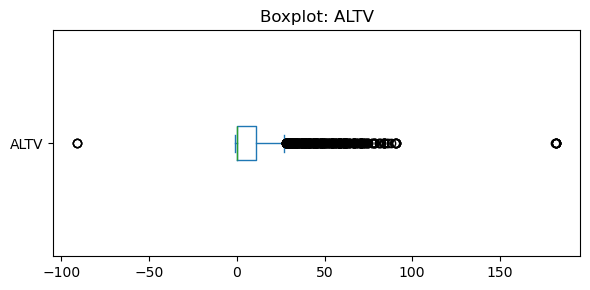

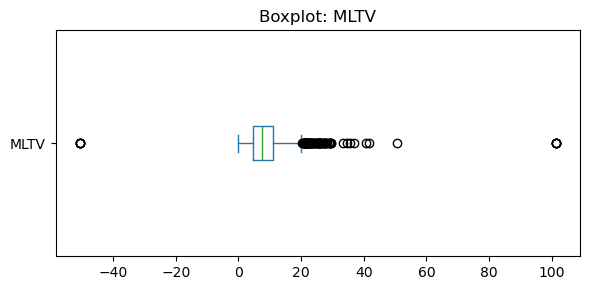

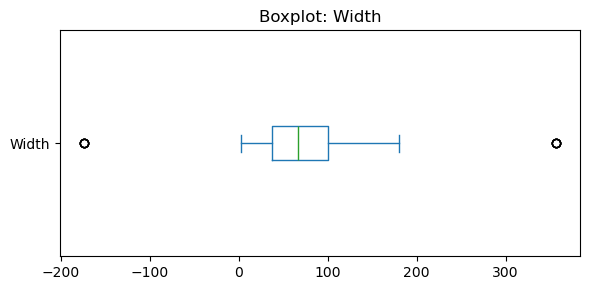

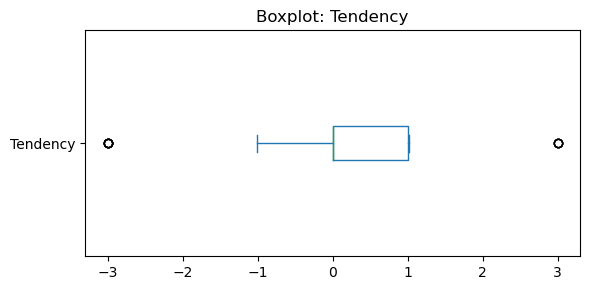

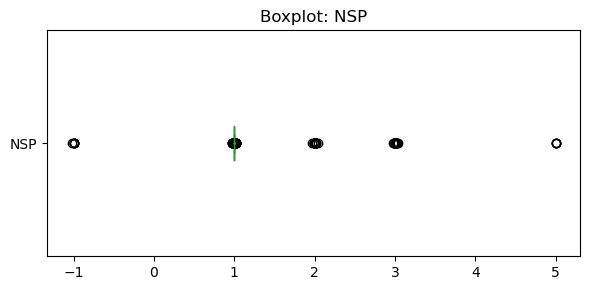

In [32]:
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    df[col].plot(kind='box', vert=False, ax=ax)
    ax.set_title(f'Boxplot: {col}')
    fig.tight_layout()
    fpath = os.path.join(output_dir, f"box_{col}.png")
    fig.savefig(fpath)
    plt.show()
    plt.close(fig)


In [33]:
#Correlation heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
cax = ax.imshow(corr, interpolation='nearest', aspect='auto')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
fig.colorbar(cax)
ax.set_title("Correlation matrix (heatmap)")
fig.tight_layout()
heatmap_path = os.path.join(output_dir, "corr_heatmap.png")
fig.savefig(heatmap_path)
plt.close(fig)
display(corr.iloc[:6,:6])
print("Saved correlation heatmap to", heatmap_path)

,LB,AC,FM,UC,DL,DS
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438
AC,-0.063830,1.000000,0.009433,0.072012,-0.093507,-0.033623
FM,0.018777,0.009433,1.000000,-0.053226,0.009718,0.029901
UC,-0.166570,0.072012,-0.053226,1.000000,0.190128,-0.006937
DL,-0.126959,-0.093507,0.009718,0.190128,1.000000,0.058625
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000


Saved correlation heatmap to /mnt/data/eda_output\corr_heatmap.png


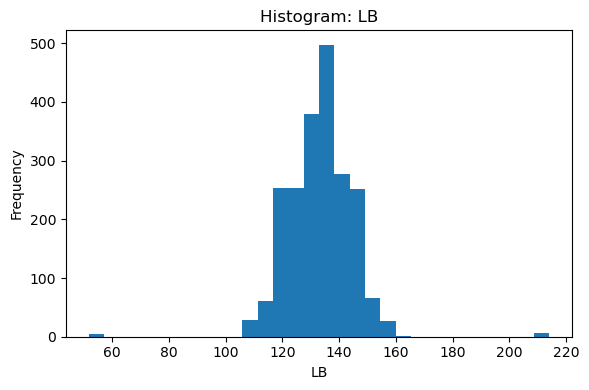

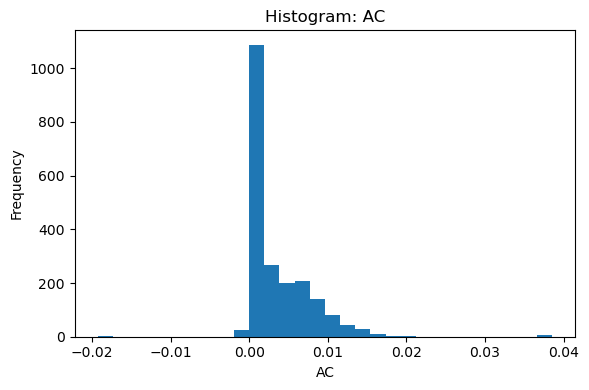

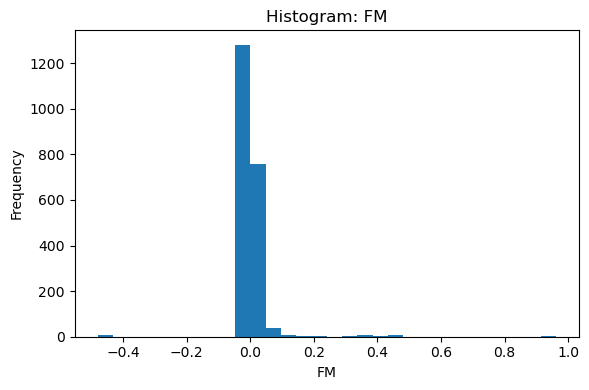

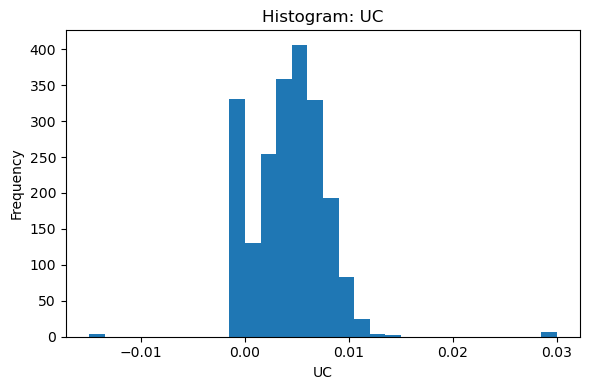

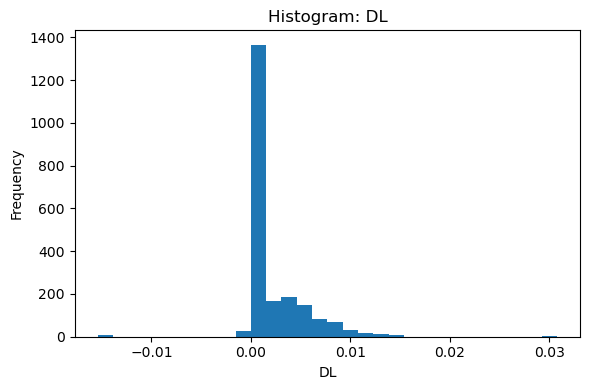

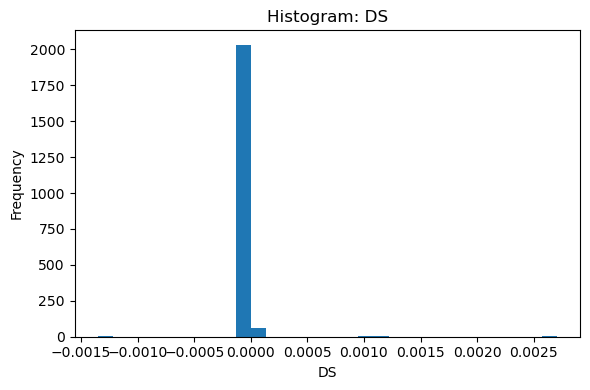

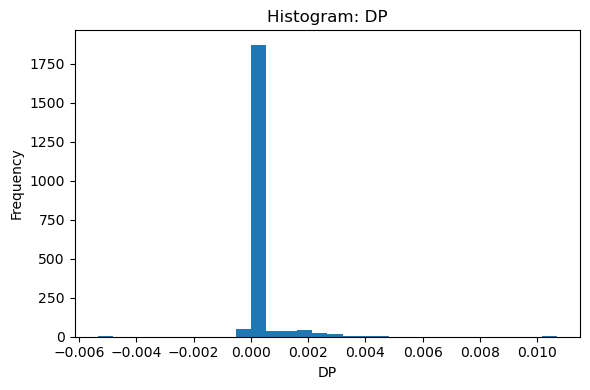

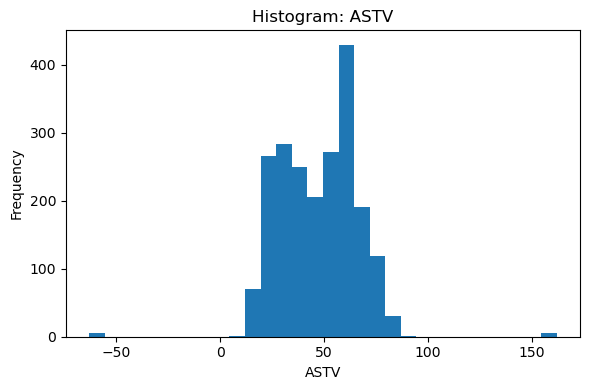

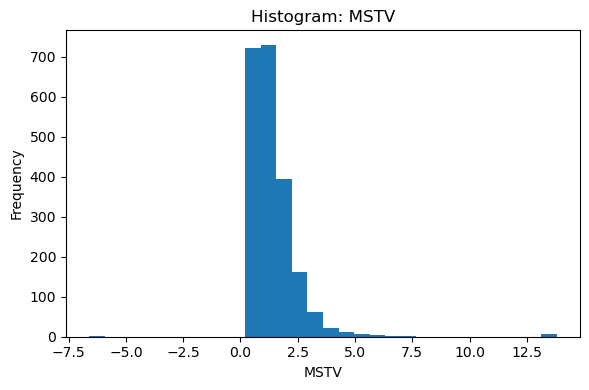

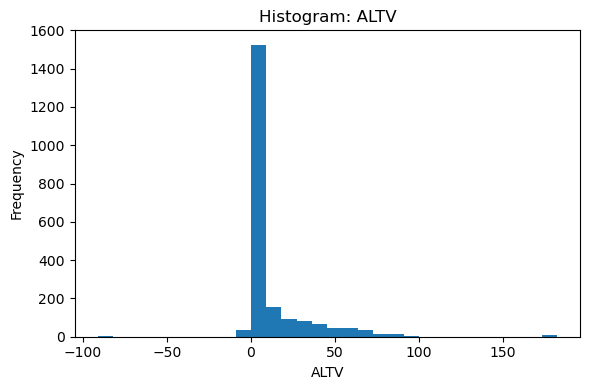

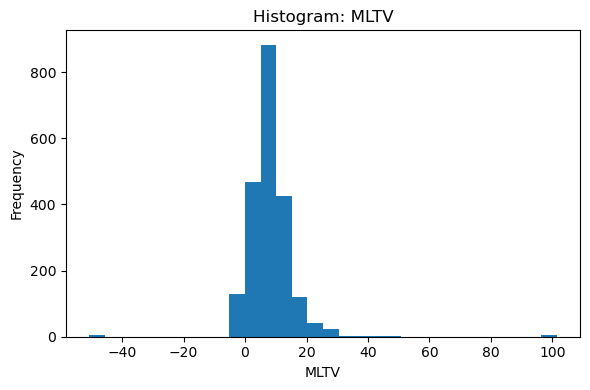

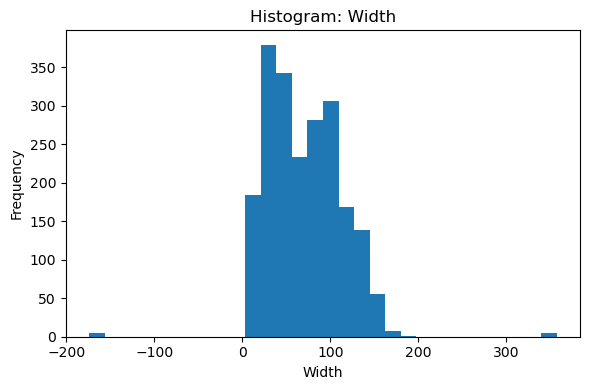

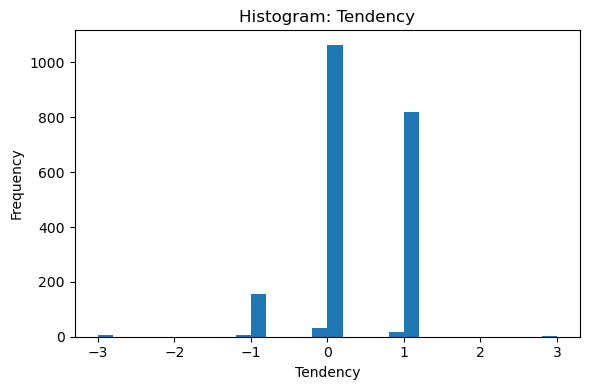

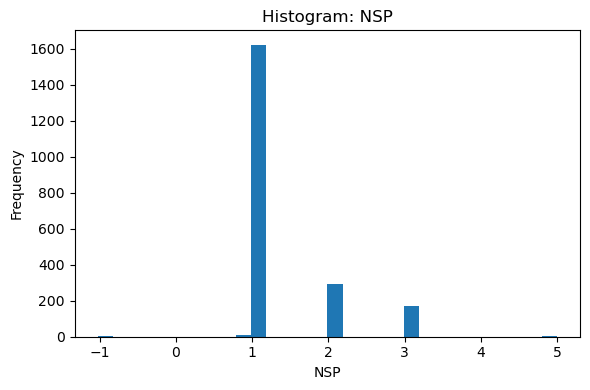

In [34]:
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    df[col].plot(kind='hist', bins=30, ax=ax)
    ax.set_xlabel(col)
    ax.set_title(f'Histogram: {col}')
    fig.tight_layout()
    fpath = os.path.join(output_dir, f"hist_{col}.png")
    fig.savefig(fpath)
    plt.show()
    plt.close(fig)


Creating Scatter Matrix...


<Figure size 1200x1200 with 0 Axes>

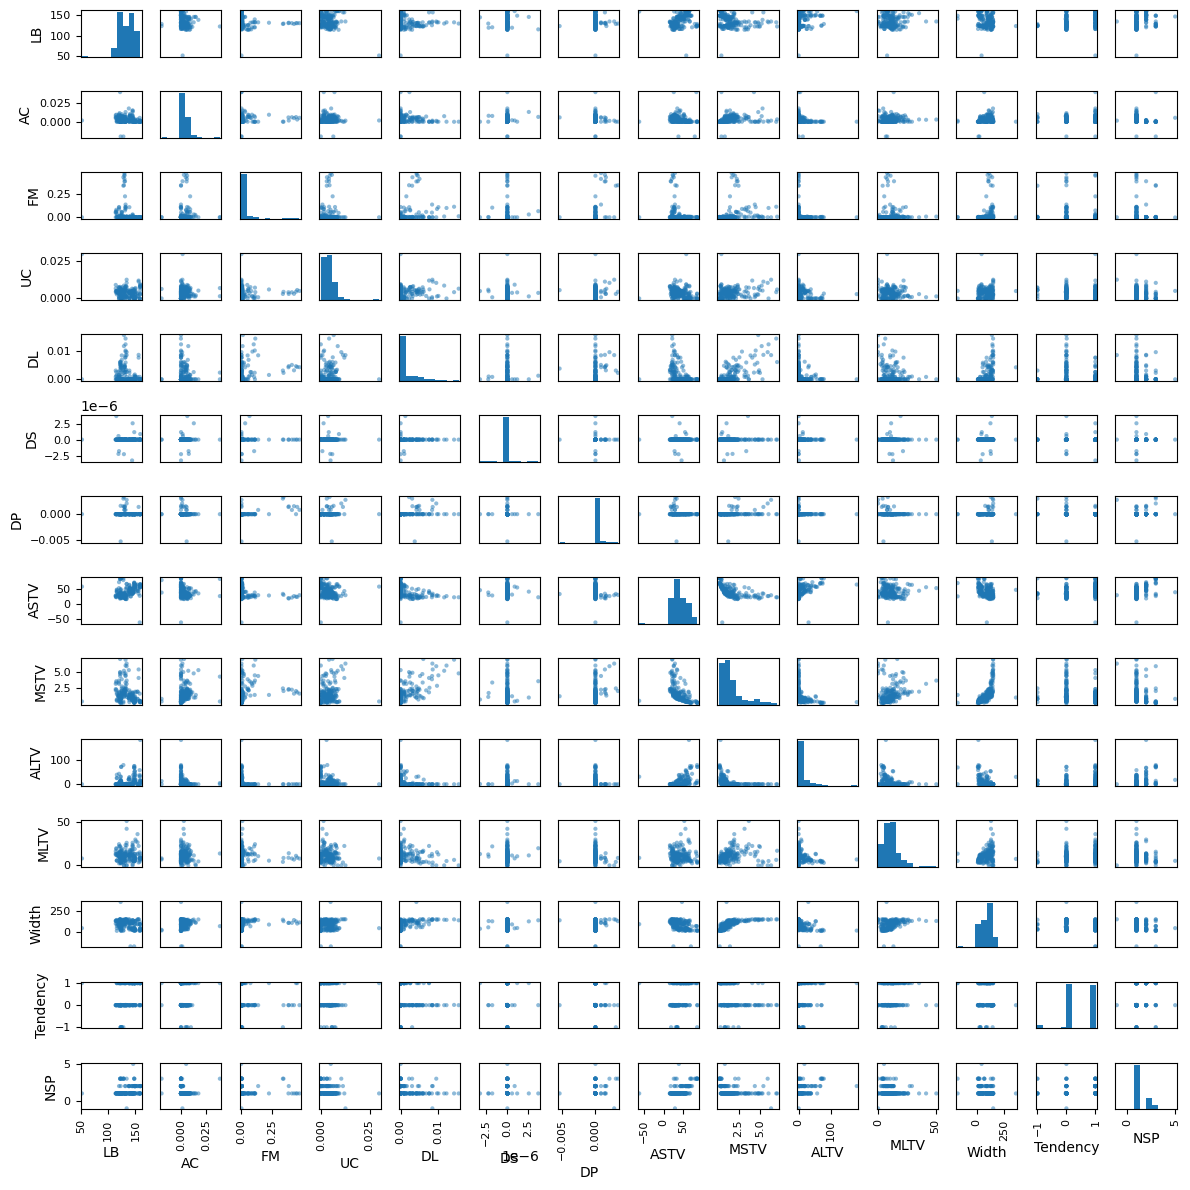

Scatter matrix saved to: /mnt/data/eda_output\scatter_matrix.png


In [35]:
#Scatter Matrix (pairwise plots)
from pandas.plotting import scatter_matrix
print("Creating Scatter Matrix...")
limit_rows = min(200, df.shape[0])
fig = plt.figure(figsize=(12,12))
axs = scatter_matrix(df.select_dtypes(include=[np.number]).iloc[:limit_rows], figsize=(12,12))
plt.tight_layout()
scatter_path = os.path.join(output_dir, "scatter_matrix.png")
plt.savefig(scatter_path)
plt.show()
print("Scatter matrix saved to:", scatter_path)

In [36]:
#NSP Bar and Pie Charts

print("Creating NSP distribution charts...")
nsp_counts = df["NSP"].value_counts().sort_index
plt.figure(figsize=(6,4))
nsp_counts.plot(kind='bar')
plt.title("NSP Distribution (Bar Chart)")
plt.xlabel("NSP")
plt.ylabel("Count")
plt.tight_layout()

bar_path = os.path.join(output_dir, "nsp_bar.png")
plt.savefig(bar_path)
plt.show()

# ---- PIE CHART ----
plt.figure(figsize=(6,6))
nsp_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title("NSP Distribution (Pie Chart)")
plt.tight_layout()
pie_path = os.path.join(output_dir, "nsp_pie.png")
plt.savefig(pie_path)
plt.show()
print("NSP charts saved to:", output_dir)

Creating NSP distribution charts...


AttributeError: 'function' object has no attribute 'plot'

<Figure size 600x400 with 0 Axes>

In [ ]:
# Cell 10 – Show all generated output files

print("\nAll generated files in:", output_dir)
print("-" * 80)
for file in sorted(os.listdir(output_dir)):
    print(file)

print("\n🎉 EDA Notebook Completed Successfully!")
